In [17]:
import pandas as pd
import numpy as np
url = "http://www.sefaz.rs.gov.br/ASP/Download/Sitagro/PPR_ATIVO.zip"

In [18]:
header_list = ['Inscrição', 'Data Abertura', 'Categoria', 'CNAE_1', 'CNAE_2', 'CNAE_3', 'Tipo', 'CPF/CNPJ']
tipos = {'Inscrição': str , 'Categoria': str, 'CNAE_1': str, 'CNAE_2': str, 'CNAE_3': str, 'Tipo': str, 'CPF/CNPJ': str}
df = pd.read_csv(url, names=header_list, dtype=tipos , sep=";")

1020723025
96013693000398

##### 5993431091 Muito bom

In [19]:
df

,Inscrição,Data Abertura,Categoria,CNAE_1,CNAE_2,CNAE_3,Tipo,CPF/CNPJ
0,0011000180,09/02/1979,PRODUTOR,0114800,0119905,0000000,F,00021063850053
1,0011000180,09/02/1979,PRODUTOR,0114800,0119905,0000000,F,00071895663091
2,0011000236,15/09/1977,MICROPRODUTOR,0111301,0000000,0000000,F,00064188868015
3,0011000309,12/02/1979,MICROPRODUTOR,0114800,0000000,0000000,F,00038850834004
4,0011000309,12/02/1979,MICROPRODUTOR,0114800,0000000,0000000,F,00078026571053
...,...,...,...,...,...,...,...,...
1233865,4971010059,12/11/2021,MICROPRODUTOR,0151201,0000000,0000000,F,00092355005087
1233866,4971010067,18/11/2021,PRODUTOR,0155501,0000000,0000000,F,00001245691023
1233867,4971010067,18/11/2021,PRODUTOR,0155501,0000000,0000000,F,00000980819008
1233868,4971010075,19/11/2021,PRODUTOR,0154700,0151201,0210101,F,00053957652049


In [20]:
temp = pd.DataFrame()
temp= df['Inscrição'][df['CPF/CNPJ'] == '5993431091'.zfill(14)].reset_index(drop = True)
nivel = 100

In [21]:
df_pesq = pd.DataFrame()
df_pesq = df[df['Inscrição'].isin(temp)]
num_ie = np.count_nonzero(df_pesq['Inscrição'].unique())
num_cpf = np.count_nonzero(df_pesq['CPF/CNPJ'].unique())
flg_ie = 0
flg_cpf = 0
flg_nivel = 0
while (num_ie != flg_ie) & (num_cpf != flg_cpf):
    if flg_nivel == nivel:
        break
    num_ie = np.count_nonzero(df_pesq['Inscrição'].unique())
    num_cpf = np.count_nonzero(df_pesq['CPF/CNPJ'].unique())
    df_pesq = pd.merge(df_pesq, df[df['CPF/CNPJ'].isin(df_pesq['CPF/CNPJ'].values)], how='outer')
    df_pesq = pd.merge(df_pesq, df[df['Inscrição'].isin(df_pesq['Inscrição'].values)], how='outer')
    flg_ie = np.count_nonzero(df_pesq['Inscrição'].unique())
    flg_cpf = np.count_nonzero(df_pesq['CPF/CNPJ'].unique())
    flg_nivel += 1
    print(flg_nivel)
    print(nivel)


1
100
2
100
3
100


In [22]:
df_pesq

,Inscrição,Data Abertura,Categoria,CNAE_1,CNAE_2,CNAE_3,Tipo,CPF/CNPJ
0,0011032456,30/11/1981,PRODUTOR,0111301,0000000,0000000,F,00005993431091
1,0011040220,20/08/1986,PRODUTOR,0111301,0151201,0000000,F,00005993431091
2,0011075660,12/06/2003,PRODUTOR,0111301,0111302,0000000,F,00005993431091
3,0011075678,05/06/2003,PRODUTOR,0111301,0115600,0000000,F,00005993431091
4,0361042191,01/04/1986,PRODUTOR,0111301,0111399,0000000,F,00000741019000
...,...,...,...,...,...,...,...,...
193,0361094400,21/08/2015,PRODUTOR,0111301,0151201,0115600,F,00001128676001
194,0361094400,21/08/2015,PRODUTOR,0111301,0151201,0115600,F,00001080339027
195,0361094400,21/08/2015,PRODUTOR,0111301,0151201,0115600,F,00000436415046
196,0361094400,21/08/2015,PRODUTOR,0111301,0151201,0115600,F,00020615736068


In [23]:
import networkx as nx
import json
from networkx.readwrite import json_graph

In [24]:
G = nx.DiGraph()

In [25]:
for index, row in df_pesq.iterrows():
    G.add_node(row['Inscrição'], name=row['Inscrição'], label="" , type="IE" , teste=123)
    G.add_node(row['CPF/CNPJ'], name=row['CPF/CNPJ'], label=row['Categoria'] , type=row['Tipo'])
for index, row in df_pesq.iterrows():
    G.add_edge(row['Inscrição'], row['CPF/CNPJ'], type=""  )

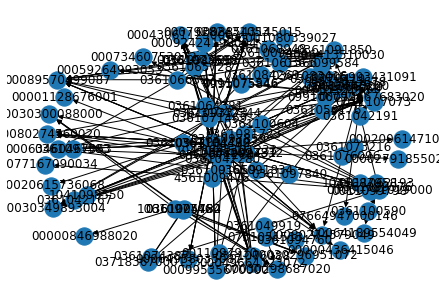

In [26]:
nx.draw(G, with_labels=True)

In [27]:
print(G.nodes()) 
list(G.nodes(data=True))

['0011032456', '00005993431091', '0011040220', '0011075660', '0011075678', '0361042191', '00000741019000', '00070667683020', '00006413510030', '0361042280', '00030349893004', '00043061125000', '00049664123072', '00080274560020', '00080274579049', '00099535670000', '0361064381', '0361066309', '0361073216', '07664947000146', '0361076096', '0361079419', '0361081731', '0361091834', '03718367000133', '0361093373', '00063460467053', '0361097832', '0361097840', '0361104472', '00079282431053', '00088543145015', '00089570499087', '00092424198004', '00064958035087', '0361104480', '0361104499', '0731042344', '0991067924', '0011062193', '0011075546', '0011097930', '0011099798', '0011107073', '0361005482', '0361024754', '0361042167', '0361049919', '0361056176', '0361061366', '0361065728', '0361066317', '0361068948', '0361071280', '0361071469', '0361073690', '0361074387', '0361076088', '0361081723', '0361083416', '0361084269', '0361088558', '0361091559', '0361091583', '0361091788', '0361091850', '03

[('0011032456',
  {'name': '0011032456', 'label': '', 'type': 'IE', 'teste': 123}),
 ('00005993431091',
  {'name': '00005993431091', 'label': 'PRODUTOR     ', 'type': 'F'}),
 ('0011040220',
  {'name': '0011040220', 'label': '', 'type': 'IE', 'teste': 123}),
 ('0011075660',
  {'name': '0011075660', 'label': '', 'type': 'IE', 'teste': 123}),
 ('0011075678',
  {'name': '0011075678', 'label': '', 'type': 'IE', 'teste': 123}),
 ('0361042191',
  {'name': '0361042191', 'label': '', 'type': 'IE', 'teste': 123}),
 ('00000741019000',
  {'name': '00000741019000', 'label': 'PRODUTOR     ', 'type': 'F'}),
 ('00070667683020',
  {'name': '00070667683020', 'label': 'PRODUTOR     ', 'type': 'F'}),
 ('00006413510030',
  {'name': '00006413510030', 'label': 'PRODUTOR     ', 'type': 'F'}),
 ('0361042280',
  {'name': '0361042280', 'label': '', 'type': 'IE', 'teste': 123}),
 ('00030349893004',
  {'name': '00030349893004', 'label': 'PRODUTOR     ', 'type': 'F'}),
 ('00043061125000',
  {'name': '00043061125000

In [28]:
print(G.edges())
list(G.edges(data=True))

[('0011032456', '00005993431091'), ('0011040220', '00005993431091'), ('0011075660', '00005993431091'), ('0011075678', '00005993431091'), ('0361042191', '00000741019000'), ('0361042191', '00005993431091'), ('0361042191', '00070667683020'), ('0361042191', '00006413510030'), ('0361042280', '00005993431091'), ('0361042280', '00070667683020'), ('0361042280', '00030349893004'), ('0361042280', '00043061125000'), ('0361042280', '00049664123072'), ('0361042280', '00080274560020'), ('0361042280', '00080274579049'), ('0361042280', '00099535670000'), ('0361064381', '00080274560020'), ('0361064381', '00005993431091'), ('0361066309', '00005993431091'), ('0361073216', '00005993431091'), ('0361073216', '07664947000146'), ('0361076096', '00080274579049'), ('0361076096', '00005993431091'), ('0361079419', '00006413510030'), ('0361079419', '00005993431091'), ('0361081731', '00005993431091'), ('0361091834', '00005993431091'), ('0361091834', '03718367000133'), ('0361093373', '00005993431091'), ('0361093373'

[('0011032456', '00005993431091', {'type': ''}),
 ('0011040220', '00005993431091', {'type': ''}),
 ('0011075660', '00005993431091', {'type': ''}),
 ('0011075678', '00005993431091', {'type': ''}),
 ('0361042191', '00000741019000', {'type': ''}),
 ('0361042191', '00005993431091', {'type': ''}),
 ('0361042191', '00070667683020', {'type': ''}),
 ('0361042191', '00006413510030', {'type': ''}),
 ('0361042280', '00005993431091', {'type': ''}),
 ('0361042280', '00070667683020', {'type': ''}),
 ('0361042280', '00030349893004', {'type': ''}),
 ('0361042280', '00043061125000', {'type': ''}),
 ('0361042280', '00049664123072', {'type': ''}),
 ('0361042280', '00080274560020', {'type': ''}),
 ('0361042280', '00080274579049', {'type': ''}),
 ('0361042280', '00099535670000', {'type': ''}),
 ('0361064381', '00080274560020', {'type': ''}),
 ('0361064381', '00005993431091', {'type': ''}),
 ('0361066309', '00005993431091', {'type': ''}),
 ('0361073216', '00005993431091', {'type': ''}),
 ('0361073216', '076

In [29]:
import os
import sys
import subprocess
path_output = "folder"

In [30]:
if not os.path.exists(path_output):
    os.mkdir(path_output)
with open('viz/template.html', 'r', encoding='utf-8') as template:
    str_html = template.read().replace('<!--GRAFO-->', json.dumps(json_graph.node_link_data(G)))

path_html = os.path.join(path_output, 'grafo.html')
with open(path_html, 'w', encoding='utf-8') as html:
    html.write(str_html)

#subprocess.Popen(['C:/Program Files (x86)/Google/Chrome/Application/chrome.exe', os.path.abspath(path_html)])

subprocess.Popen(['C:\Program Files (x86)\Microsoft\Edge\Application\msedge.exe', os.path.abspath(path_html)])

In [ ]:
del(G)